# 내가 만약 축구팀 감독이라면 

## 05. 학습하기
### 5-1. 비슷한 특성의 데이터끼리 묶기

### 5-2. K-평균(K-Means) 군집화 알고리즘의 동작 과정 알아보기

#### [Step 1] 표본공간에 K개의 중심을 무작위로 생성하기 

#### [Step 2] 각 표본을 가장 가까운 중심(centroid)에 할당하기 

####[Step 3] 각 군집의 중심을 새롭게 계산하기

### 5.3  프로그램 작성하기
- K-평균 군집화 알고리즘을 이용해 여러 선수들의 체력과 드리블 능력 데이터를 상, 중, 하 3개 팀으로 나눠보기

#### **[Step 1] 데이터 불러오기**

In [ ]:
# fifa 2019.csv 파일 업로드하기 
from google.colab import files

uploaded = files.upload()

- Overall(전반적인 능력치) 기준으로 내림차순 200개 추출해서 (데이터프레임 : df)
- column이 'Name', 'Stemina', 'Dribblinig', 'ShortPassing', 'Penalties' 인 데이터프레임(test_df) 만들기

**1. 판다스 불러오기** <br>

**2. 판다스를 이용해 fifa2019 데이터프레임(fifa2019) 생성하기** <br>

**3. fifa2019 데이터 프레임에서 Overall 내림차순으로 선수 200명을 복사해 df 데이터프레임 생성하기** <br>
  - Overall(전반적인 능력치) 기준으로 내림차순하기 (ascending=False)

In [4]:
# 1. (실습) 판다스 불러오기 
import pandas as pd

# 2. (실습)fifa2019 데이터프레임 생성하기 
fifa2019 = pd.read_csv('fifa2019.csv')

# 3. (실습) df데이터프레임 : fifa2019 훈련에 참여한 선수 200명을 복사(pd.DataFrame.copy)해 df 데이터프레임 생성하기 
# fifa2019.sort_values - 'Overall'(전반적인 능력치) 기준으로 내림차순 (ascending=False) 하기 
df = pd.DataFrame.copy(   fifa2019.sort_values(by='Overall', ascending=False).head(200))
print(df)

     Unnamed: 0      ID               Name  Age  \
0             0  158023           L. Messi   31   
1             1   20801  Cristiano Ronaldo   33   
2             2  190871          Neymar Jr   26   
3             3  193080             De Gea   27   
4             4  192985       K. De Bruyne   27   
..          ...     ...                ...  ...   
166         166  212523   Anderson Talisca   24   
165         165  213331             J. Tah   22   
164         164  213345           K. Coman   22   
163         163  213565           T. Lemar   22   
162         162  219683         C. Tolisso   23   

                                              Photo Nationality  \
0    https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1     https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2    https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3    https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4    https://cdn.sofifa.org/players/4/19/192985.png 

- Overall(전반적인 능력치) 기준으로 내림차순 200개 추출해서 (데이터프레임 : df)
- column이 'Name', 'Stemina', 'Dribblinig', 'ShortPassing', 'Penalties' 인 데이터프레임(test_df) 만들기<br>

**4. test_feature : 특성 이름 리스트 만들기**<br> 
  - 이름('Name'), 체력('Stamina'), 드리블('Dribbling'), 짧은 패스('ShortPassing'), 패널티킥('Panalties')<br>

**5.  df, test_feature 이용해서 test_df 데이터프레임 생성하기**<br>
  - pd.DataFrame() : 데이터프레임 생성하기 <br>

**6. test_df 데이터프레임 5개만 출력하기**

In [5]:
# 4. test_feature : 특성 이름 리스트 만들기 
# 이름('Name'), 체력('Stamina'), 드리블('Dribbling'), 짧은 패스('ShortPassing'), 패널티킥('Panalties')
# 'Name', 'Stemina', 'Dribblinig', 'ShortPassing', 'Penalties'
test_features = ['Name', 'Stamina', 'Dribbling', 'ShortPassing', 'Penalties']

# 5. df, test_feature 이용해서 test_df 데이터프레임 생성하기
test_df = pd.DataFrame(df, columns=test_features)

# 6. test_df 데이터 프레임 5개만 출력하기 
print(test_df.head(5))

                Name  Stamina  Dribbling  ShortPassing  Penalties
0           L. Messi     72.0       97.0          90.0       75.0
1  Cristiano Ronaldo     88.0       88.0          81.0       85.0
2          Neymar Jr     81.0       96.0          84.0       81.0
3             De Gea     43.0       18.0          50.0       40.0
4       K. De Bruyne     90.0       86.0          92.0       79.0


####**[Step 2] 학습 데이터 준비하기** 

1. XY 넘파이 배열 만들기 : test_df 데이터프레임 이용하기 
2. 학습 데이터 만들기(X 넘파이 배열) : 체력('Stamina', 1번 열), 드리블('Dribbling', 2번 열)만 들어간 학습 데이터

- numpy : 행렬연산을 위한 라이브러리, 배열 생성 

```python
import numpy as np          # 넘파이 불러오기
배열명 = np.array(리스트)   # 리스트를 넘파이 배열로 생성하기
```

In [9]:
# 체력('Stamina'), 드리블('Dribbling')
# 1. (실습) numpy 불러오기 
import numpy as np

# 2. (실습) test_df 데이터프레임 이용해 XY 배열 만들기 
XY = np.array(test_df)

# XY 배열 출력하기 
#print(XY)

# 3. (실습) 학습 데이터 만들기(X 배열) 
# X(선수정보) - XY 배열에 속한 축구선수들[:]의 체력(1번 열), 드리블(2번 열) 값[1:3] 저장한 배열 생성 
X = XY[:, 1:3]
print(X)
print(len(X))

[[72.0 97.0]
 [88.0 88.0]
 [81.0 96.0]
 [43.0 18.0]
 [90.0 86.0]
 [83.0 95.0]
 [89.0 90.0]
 [90.0 87.0]
 [84.0 63.0]
 [66.0 53.0]
 [78.0 89.0]
 [41.0 12.0]
 [75.0 81.0]
 [78.0 85.0]
 [86.0 80.0]
 [65.0 58.0]
 [76.0 89.0]
 [43.0 30.0]
 [92.0 80.0]
 [89.0 80.0]
 [38.0 13.0]
 [35.0 17.0]
 [83.0 88.0]
 [80.0 92.0]
 [96.0 79.0]
 [66.0 68.0]
 [39.0 26.0]
 [41.0 12.0]
 [74.0 62.0]
 [70.0 84.0]
 [41.0 10.0]
 [75.0 87.0]
 [91.0 90.0]
 [79.0 91.0]
 [76.0 79.0]
 [92.0 84.0]
 [70.0 94.0]
 [75.0 90.0]
 [70.0 85.0]
 [87.0 69.0]
 [84.0 89.0]
 [83.0 90.0]
 [80.0 83.0]
 [65.0 59.0]
 [84.0 84.0]
 [84.0 86.0]
 [75.0 71.0]
 [75.0 91.0]
 [91.0 80.0]
 [84.0 80.0]
 [39.0 16.0]
 [88.0 87.0]
 [71.0 66.0]
 [72.0 77.0]
 [78.0 69.0]
 [75.0 90.0]
 [55.0 90.0]
 [79.0 77.0]
 [69.0 84.0]
 [69.0 64.0]
 [78.0 86.0]
 [74.0 62.0]
 [71.0 69.0]
 [87.0 69.0]
 [73.0 87.0]
 [87.0 75.0]
 [41.0 23.0]
 [92.0 80.0]
 [77.0 90.0]
 [73.0 57.0]
 [90.0 87.0]
 [78.0 88.0]
 [71.0 70.0]
 [84.0 87.0]
 [78.0 92.0]
 [79.0 88.0]
 [78.0 92.0]

####**[Step 3] K-평균 군집화 알고리즘 적용하기**

##### **[1단계] 표본공간에 k개의 중심을 무작위로 생성하기** 
**1. 표본공간에서 사용할 중심을 생성해보자.**
- 데이터셋($X$ 배열)에서 체력 데이터, 드리블 데이터를 무작위로 3개 뽑아서 2차원 배열 $C$를 생성하기 
<br><br>
  - $X$ 배열 : 체력(0번) -  드리블(1번)<br><br>
  - $C_x$ 배열 만들기(x-체력) 
    - $X$배열에서 체력 데이터(0번 열)에서 무작위로 3개 뽑아 1차원 넘파이 배열 만들기 <br><br>
  - $C_y$ 배열 만들기(y-드리블) 
    - $X$배열에서 드리블 데이터(1번 열)에서 무작위로 3개 뽑아 1차원 넘파이 배열 만들기<br><br> 
  - $C$ 
    - $C_x$(체력 배열), $C_y$(드리블 배열)을 묶어서 리스트로 만들어 넘파이 배열로 만들기 

In [11]:
# 분류하려는 군집의 갯수(k) : 3
k = 3

# (실습) C_x : X배열에서 체력 데이터(0번 열)를 무작위로 3개 뽑아 1차원 넘파이 배열 만들기 
# np.random.choice(X[:, 0], 3)
C_x = np.random.choice(X[:, 0], 3) 
print("C_x array : " ,C_x)

# (실습) C_y : X배열에서 드리블 데이터(1번 열)를 무작위로 3개 뽑아 1차원 넘파이 배열 만들기 
C_y = np.random.choice(X[:, 1], 3)
print("C_y array : ", C_y)

# A : C_x(체력 배열), C_y(드리블 배열)을 묶어서 리스트 만들기 
# list(zip())
A = list(zip(C_x, C_y))

# C : 중심점 배열 만들기
C = np.array(list(zip(C_x, C_y)))
print(C)

C_x array :  [72.0 75.0 78.0]
C_y array :  [89.0 90.0 63.0]
[[72. 89.]
 [75. 90.]
 [78. 63.]]


**2. 생성 결과를 시각적으로 확인해보자.**
- $test_{df} : Name,  Stamina,  Dribbling,  ShortPassing,  Penalties$


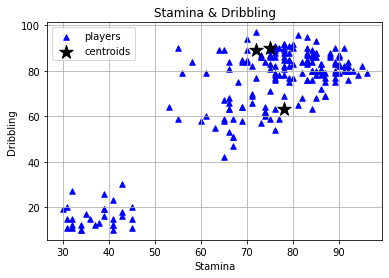

In [12]:
# matplotlib.pyplot 불러오기 
import matplotlib.pyplot as plt

# test_df에서 Stamina(체력), Dribbling(드리블) 만 들어간 시리즈 만들기 
Stamina = test_df['Stamina']
Dribbling = test_df['Dribbling']

# 그래프 그리기 
plt.title('Stamina & Dribbling')
plt.xlabel('Stamina')
plt.ylabel('Dribbling')

# (실습) x: Stamina, y : Dribbling 값을 산점도로 표현하기 
# 삼각형^, 파란색, 크기 30, 레이블 players
plt.scatter(Stamina, Dribbling, c='blue', s=30, marker='^', label='players')

# (실습) x : C_x, y : C_y 값을 산점도로 표현하기 
# s : size, c : color,별, 검은색,  크기 200, 레이블 centroids
plt.scatter(C_x, C_y, s=200, c='black', marker='*', label='centroids')

# 범례 표시하기 (loc : 위치, 'lower right' : 오른쪽 아래, 'best' : 최적 )
plt.legend()
plt.grid()
plt.show()

##### **[2단계] 각 표본에 가까운 중심에 할당하기** 
**1. 거리를 추측하는 함수 만들기**
- 유클리디안 거리 계산함수 만들기 

   $ Distance(A, B) = \sqrt{(A - B)^2} $
   ```python
   Distance(A, B) : np.sqrt(np.sum(np.power((A-B), 2)))
   ```

In [13]:
# (실습) 유클리디안 거리 계산 함수 만들기
def Distance(A, B):
  return np.sqrt(np.sum(np.power((A-B), 2)))

**2. 각 군집의 중심을 새롭게 계산하기**
- $X$(선수정보) 
  - 축구선수들의 체력(1번 열), 드리블(2번 열) 값 저장한 배열 생성 <br><br>
- $C$ 배열 : 현재 중심 위치값<br><br>
- $temp = Distance(X[i], C[j])$
  - 군집중심($C[j]$)과 선수 데이터($X[i]$)간의 거리계산 결과 저장 
  - $distances.append(temp)$ : 각 거리계산한 값을 리스트에 추가 <br><br>
- $clusters$ 배열
  - 입력값과 각 중심값 사이의 거리 중 가장 짧은 거리의 인덱스 저장



##### **[3 단계] 각 군집의 중심(C)을 새롭게 계산하기**
- $points$ 리스트 
  -  군집의 중심값별로 데이터를 모아서 $points$ 리스트에 저장함 <br><br>
- $C$ 배열 : points 리스트 값의 평균을 구해서 업데이트한 중심 위치값<br><br>
- $C_{old}$ 배열 : 이전 중심위치값 저장 배열<br><br>
- $flag$
  - $C$와 $C_{old}$ 유클리드 거리 구하기
  - (추후) $C$와 $C_{old}$ 거리차이가 0이 될때까지 <br><br>


In [14]:
# 현재중심위치값과 이전중심위치값의 거리 구하기 
# C_old 배열 만들기(C 배열 모양만큼 0으로 초기화하기)
C_old = np.zeros(C.shape)

# clusters 배열 만들기 (입력값과 각 중심점 사이의 거리 중 가장 짧은 거리의 인덱스 저장)
clusters = np.zeros(len(X))

# C배열 (체력과 드리블 3*2로 만든 배열), C_old(3*2,0으로 초기화한 배열)
# 유클리드 거리 구하기 
flag = Distance(C, C_old)

print("C_old : \n", C_old)
print("C : \n", C)
print("flag : ", flag)

C_old : 
 [[0. 0.]
 [0. 0.]
 [0. 0.]]
C : 
 [[72. 89.]
 [75. 90.]
 [78. 63.]]
flag :  192.04947279281973


In [15]:
# (실습)from 모듈 import 변수/함수 : copy 모듈로부터 deepcopy 함수를 불러온다.
from copy import deepcopy

# distances 리스트 : 군집중심과 데이터간의 거리계산 결과 저장 
distances = []

# while 문 : 군집중심의 좌표가 변화가 없을때까지 while 문안의 명령어를 반복 실행함 
while flag != 0 :
  # for 문 : 선수들의 수만큼 계산을 반복하면서 선수들 각각의 체력, 드리블 값과 임의의 군집중심의 값의 거리를 계산 
  for i in range(len(X)):   # i = 선수 데이터(X)
    for j in range(3):      # j = 중심 위치(C) - 3개
    # (실습) 선수 한명(X[i])과 3개 각각의 군집 중심값(C[j])의 거리 계산해 temp 저장
      temp = Distance(X[i], C[j])
      distances.append(temp)       # 계산한 값(temp)을 리스트에 추가함
    # (실습) distances의 최솟값을 가진 값의 인덱스 번호(np.argmin(distances)를 cluster에 저장함
    cluster = np.argmin(distances)
    # (실습) cluster 변수값을 리스트 clusters[i]에 저장함
    clusters[i] = cluster          
    distances = []                 # distances 값 초기화(다음 i번째 선수와 군집의 중심간의 거리 계산해서 새롭게 저장해야 함)
  print("clusters : ",clusters)    # 200명의 선수가 순서대로 어떤 군집에 해당되는지 0, 1, 2 숫자로 매칭되어 나열됨

  print(" 2단계 끝 : 각 표본에 가까운 중심에 할당하기==================================")
  C_old = deepcopy(C)              # 지금까지 사용된 중심을 C_old에 복사함 
  # 같은 군집끼리 데이터를 모아서 새로운 군집의 중심을 계산함
  for i in range(k):            
    # 군집의 중심값별로 데이터를 모아서 points 리스트에 저장함   
    points = [X[j] for j in range(len(X)) if clusters[j] == i]        
    print("i : ", i, " points : ", points)
    # (실습) 리스트 points 값의 평균(np.mean)을 계산해 C[i]에 저장함.
    C[i] = np.mean(points)                                            
  # (실습) 새롭게 계산된 군집의 중심(C)과 이전의 중심(C_old)간의 거리차 계산 
  flag = Distance(C, C_old)
  print("3단계 끝 : 각 군집의 중심(C)을 새롭게 계산하기+++++++++++++++++++++++++++++++++++++++++++++++")


clusters :  [1. 1. 1. 2. 1. 1. 1. 1. 2. 2. 1. 2. 0. 1. 1. 2. 1. 2. 1. 1. 2. 2. 1. 1.
 1. 2. 2. 2. 2. 0. 2. 1. 1. 1. 0. 1. 0. 1. 0. 2. 1. 1. 1. 2. 1. 1. 2. 1.
 1. 1. 2. 1. 2. 0. 2. 1. 0. 1. 0. 2. 1. 2. 2. 2. 0. 2. 2. 1. 1. 2. 1. 1.
 2. 1. 1. 1. 1. 2. 0. 1. 1. 2. 2. 1. 2. 2. 2. 0. 2. 2. 1. 0. 2. 1. 1. 1.
 2. 1. 1. 2. 2. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 0. 2. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 2. 2. 0. 2. 2. 1. 2. 0. 0. 2. 0. 2. 1. 1. 2. 1. 1. 2. 1. 1. 2. 2.
 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 0. 1. 0. 2. 2. 2. 1. 1. 2. 2. 2. 1. 1.
 1. 1. 2. 2. 2. 1. 2. 2. 2. 0. 0. 0. 1. 2. 2. 2. 2. 2. 2. 0. 2. 2. 2. 1.
 1. 1. 1. 0. 2. 1. 1. 2.]
 2단계 끝 : 각 표본에 가까운 중심에 할당하기==================================
i :  0  points :  [array([75.0, 81.0], dtype=object), array([70.0, 84.0], dtype=object), array([76.0, 79.0], dtype=object), array([70.0, 94.0], dtype=object), array([70.0, 85.0], dtype=object), array([72.0, 77.0], dtype=object), array([55.0, 90.0], dtype=object), array([69.0, 84.0], dtype=object), array([73.0, 87.0

### 5.4 문제 해결하기 


- 1번 군집
  - 200명의 선수(X)중에서 군집화 결과가 0번에 해당하는 선수(1번 군집)만을 찾아서 <br>
  그 선수의 체력(X[clusters == 0,0])을 산점도의 x 좌표로, <br>
  드리블(X[clusters == 0,1])을 y 좌표로 지정해서 붉은색으로 나타냄 

- 군집의 중심(C)을 x축 값(C[:, 0))과 y축 값(C[:, 1])을 검은색으로 나타냄 

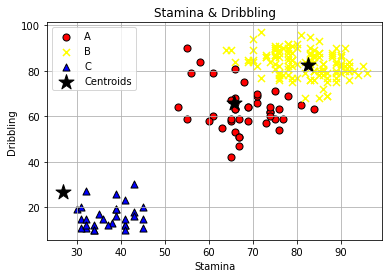

In [16]:
# 군집화 결과 시각화하기
import matplotlib.pyplot as plt

# 그래프 그리기 
plt.title('Stamina & Dribbling')
plt.xlabel('Stamina')
plt.ylabel('Dribbling')
# 1번 군집
plt.scatter(X[clusters == 0,0], X[clusters == 0,1], s=50, c='red', marker='o', edgecolor='black', label='A')

# 2번 군집
plt.scatter(X[clusters == 1,0], X[clusters == 1,1], s=50, c='yellow', marker='x', edgecolor='black', label='B')

# 3번 군집
plt.scatter(X[clusters == 2,0], X[clusters == 2,1], s=50, c='blue', marker='^', edgecolor='black', label='C')

# 군집의 중심 좌표들
plt.scatter(C[:, 0], C[:, 1], s=250, marker='*', c='black', edgecolor='black', label='Centroids')

plt.legend()
plt.grid()
plt.show()

In [ ]:
# K-평균 군집화 알고리즘 적용하기 - 각 군집의 중심을 새롭게 계산하기

import pandas as pd


fifa2019 = pd.read_csv('fifa2019.csv')
df = pd.DataFrame.copy(fifa2019.sort_values(by = 'Overall', ascending = False ).head(200))
test_features=['Name','Stamina','Dribbling','ShortPassing','Penalties']
test_df= pd.DataFrame(df , columns = test_features)


# 학습 데이터 준비하기
import numpy as np 
XY = np.array(test_df)
X = XY[:,1:3]


# 표본공간에 k개의 중심을 무작위로 생성하기
k = 3                               #분류하려는 군집의 개수가 3개이므로 k=3
C_x = np.random.choice(X[:,0],k)
C_y = np.random.choice(X[:,1],k)
C = np.array(list(zip(C_x, C_y)))


# 거리를 측정하는 함수 만들기 
# 유클리디안 거리 계산 함수 만들기
def Distance(A, B):
    return np.sqrt(np.sum(np.power((A-B),2)))

# 각 군집의 중심을 새롭게 계산하기 

C_old = np.zeros(C.shape)           # 중심의 좌표를 업데이트하기 위해 동일한 크기의 행렬을 선언 
clusters = np.zeros(len(X))         # 모든 데이터의 클러스터 라벨을 저장하기 위해 행렬을 선언, 초깃값은 0으로 할당
flag = Distance(C, C_old)           # 반복문의 종료 기준이 될 변수 선언, 중심 C의 좌표가 더이상 변화가 없을 때까지 반복하는 기준이 됨.

# ---------------------------------------------------------------------------------

# 클러스터 할당이 변경되지 않을 때까지 반복하기
from copy import deepcopy

distances = []
while flag !=0:                     
    for i in range(len(X)):
      for j in range(3):
        temp = Distance(X[i], C[j])
        distances.append(temp)
      cluster = np.argmin(distances)
      clusters[i] = cluster
      distances = []
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points)
    flag = Distance(C, C_old)
    
# 군집화 결과 시각화하기
import matplotlib.pyplot as plt

# 1번 군집
plt.scatter(X[clusters == 0,0], X[clusters == 0,1], s=50, c='red', marker='o', edgecolor='black', label='A')

# 2번 군집
plt.scatter(X[clusters == 1,0], X[clusters == 1,1], s=50, c='yellow', marker='x', edgecolor='black', label='B')

# 3번 군집
plt.scatter(X[clusters == 2,0], X[clusters == 2,1], s=50, c='blue', marker='^', edgecolor='black', label='C')

# 군집의 중심 좌표들
plt.scatter(C[:, 0], C[:, 1], s=250, marker='*', c='black', edgecolor='black', label='Centroids')
plt.legend()
plt.grid()
plt.show()

#### [팁] 객체 복사 (copy, deepcopy)
- 리스트에서 복사(b = a)
  - 참조형태로 전달됨 
  - 실제로 같은 물리공간에 위치한 데이터를 가리키게 됨
  - a 리스트의 값이 변경되면 b 리스트의 값도 변경됨
- 깊은 복사(deepcopy)
  - from copy import deepcopy 
  - 값을 모두 복사하는 형태

In [ ]:
# (팁) 일반 복사(copy)
a = ['A', 'B']
b = a
print("before a : ", a)
print("before b : ", b)
a[0] = 'C'
print("after a : ", a)
print("after b : ", b)


In [ ]:
# (팁) 깊은 복사(deepcopy)
from copy import deepcopy
a = ['A', 'B']
b = deepcopy(a)
print("before a : ", a)
print("before b : ", b)
a[0] = 'C'
print("after a : ", a)
print("after b : ", b)